In [1]:
# %matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt

import numpy as np
import pycoco as pcc
import lsst_tools as lsstt

from astropy.cosmology import LambdaCDM

In [13]:
from scipy.stats import rv_continuous
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
pcc.utils.setup_plot_defaults()

http://iopscience.iop.org/article/10.3847/1538-4357/aa5eb7/pdf

## CC SNe, out to 60 Mpc 

|SN type	|  ${M_*}<{10}^{10}{M}_{\odot }$Number	|Fraction	| Number	| Fraction	| Probability |
| ------------- |---------------- |------------- |------------- |------------- |------------- |
|IIP/L	| ${25}_{-6}^{+6}$	|${0.60}_{-0.14}^{+0.15}$	|${40}_{-7}^{+7}$	|${0.6}_{-0.1}^{+0.1}$	|18%|
|II-87A	| ${3.0}_{-2.0}^{+2.0}$	|${0.08}_{-0.05}^{+0.05}$	|${0.0}_{-0.0}^{+1.8}$	|${0.000}_{-0.000}^{+0.025}$	|1.4%|
|IIn	| ${3.0}_{-2.0}^{+2.0}$	|${0.07}_{-0.05}^{+0.05}$	|${2.0}_{-1.0}^{+1.0}$	|${0.028}_{-0.014}^{+0.014}$	|10%|
|IIb	| ${4.6}_{-2.0}^{+2.3}$	|${0.11}_{-0.05}^{+0.06}$	|${7.6}_{-2.6}^{+2.8}$	|${0.11}_{-0.04}^{+0.04}$	|30%|
|Ib	| ${0.9}_{-0.5}^{+0.7}$	|${0.022}_{-0.012}^{+0.017}$	|${10.1}_{-3.5}^{+4.1}$	|${0.14}_{-0.05}^{+0.06}$	|1.3%|
|Ic	| ${1.8}_{-1.1}^{+1.3}$	|${0.044}_{-0.027}^{+0.032}$	|${5.0}_{-2.0}^{+2.0}$	|${0.07}_{-0.03}^{+0.03}$	|25%|
|(Ib+Ic)a	| ${2.7}_{-1.2}^{+1.5}$	|${0.07}_{-0.03}^{+0.04}$	|${15}_{-4}^{+5}$	|${0.22}_{-0.06}^{+0.07}$	|1.4%|
|IIb-pec	| ${0.6}_{-0.6}^{+0.6}$	|${0.015}_{-0.015}^{+0.015}$	|${0.0}_{-0.0}^{+1.8}$ |	${0.000}_{-0.000}^{+0.025}$	|34%|
|Ic-pec	| ${0.0}_{-0.0}^{+1.8}$	|${0.00}_{-0.00}^{+0.04}$	|${1.0}_{-1.0}^{+1.0}$	|${0.014}_{-0.014}^{+0.014}$	|34%|
|Ic-BL	| ${0.4}_{-0.4}^{+0.4}$	|${0.01}_{-0.01}^{+0.01}$	|${1.5}_{-1.0}^{+1.0}$	|${0.021}_{-0.014}^{+0.014}$	|61%|
|Ca-rich	|${1.3}_{-1.3}^{+1.3}$	|${0.03}_{-0.03}^{+0.03}$	|${2.4}_{-1.3}^{+1.4}$	|${0.034}_{-0.018}^{+0.020}$	|41%|
Total	40.8	70.6	 


|SN Type|Number|
|:----|:----|
|IIb | 12.2|
|IIb-pec | 0.6 |
|Ib | 11|
|Ic | 6.8|
|Ic-pec |1.0|
|Ic-bl|1.9|

total = 33.5

|SN Type|Number|Fraction|
|:----|:----|:----|
|IIb | 12.8|0.382|
|Ib | 11|0.328|
|Ic | 9.7|0.290|

total = 33.5


In [3]:
info = pcc.InfoClass()
info.load()
info.table

snname,z_obs,mu,RA,Dec,Type,SkyCoords
,,,,,,"deg,deg"
str8,float64,float64,str13,str13,str3,object
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,"148.85322791666664,69.02047277777778"
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,"202.47529999999995,47.191805555555554"
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,"165.92491666666666,28.903805555555554"
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,"354.06125,2.1524444444444444"
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,"24.099375,15.753666666666666"
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,"350.2640833333333,-4.8959722222222215"
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,"179.45933333333332,25.265305555555557"
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,"155.9874583333333,-3.191472222222222"


In [4]:
def choose_subtype(return_string = True):
    """
    1|Ib | 11|0.328|
    2|Ic | 9.7|0.290|
    3|IIb | 12.8|0.382|
    total - 33.5
    """
    n = 33.5 * np.random.random()
    
    if n <= 11:
        if return_string:
            return "Ib"
        else:
            return 1
        
    if 11 < n <= 11+9.7:
        if return_string:
            return "Ic"
        else:
            return 2
        
    if 11+9.7 < n <= 11+9.7+12.8:
        if return_string:
            return "IIb"
        else:
            return 3 
    pass

def choose_extinction_host(x0 = 0.0, sigma = 0.2, n = 10000):
    """
    """
    return np.fabs(np.random.normal(loc = x0, scale = sigma, size = n))


def choose_magoffset(x0 = 0.0, sigma = 0.2, n = 10000):
    """
    """
    return np.random.normal(loc = x0, scale = sigma, size = n)


## Tests
Check that the values are OK

---
## Choose Subtype
___

In [5]:
a = []
n = 1000000
for i in np.arange(n):
    a.append(choose_subtype(return_string=False))
a = np.asarray(a)

w1 = np.where(a == 1)
w2 = np.where(a == 2)
w3 = np.where(a == 3)

print(len(a[w1]), len(a[w2]), len(a[w3]))
print(len(a[w1])/n, len(a[w2])/n, len(a[w3])/n)

# 328358 289969 381673
# 0.328358 0.289969 0.381673

328655 288922 382423
0.328655 0.288922 0.382423


## Choose Extinction Host
____

<IPython.core.display.Javascript object>


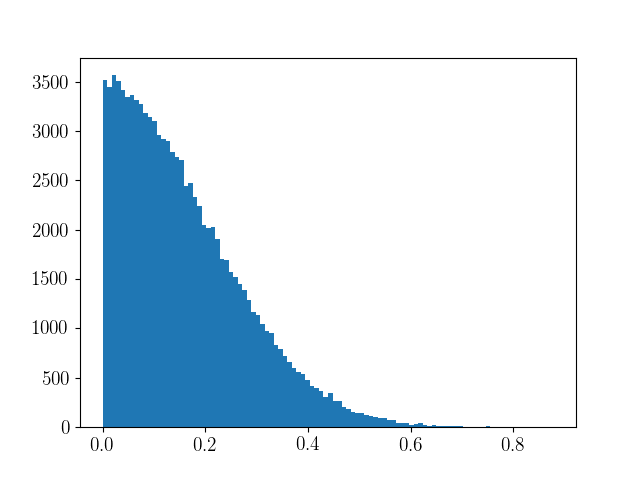

In [6]:
n = 100000
h = plt.hist(choose_extinction_host(n = n), bins = 100)

## Choose Offset
___

<IPython.core.display.Javascript object>


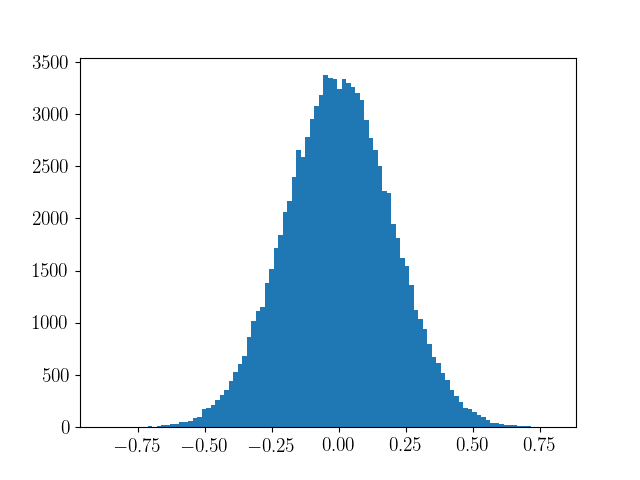

In [7]:
n = 100000
h = plt.hist(choose_magoffset(n = n), bins = 100)

## Choose z_obs
___

<IPython.core.display.Javascript object>


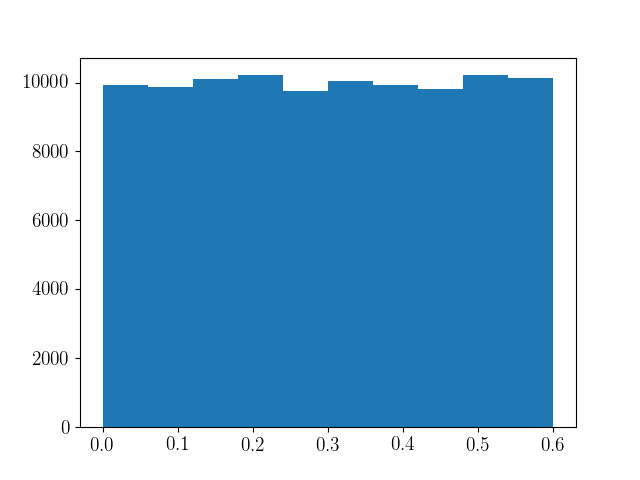

(array([  9944.,   9870.,  10094.,  10214.,   9746.,  10042.,   9931.,
          9817.,  10213.,  10129.]),
 array([  1.70346214e-05,   6.00146229e-02,   1.20012211e-01,
          1.80009800e-01,   2.40007388e-01,   3.00004976e-01,
          3.60002564e-01,   4.20000153e-01,   4.79997741e-01,
          5.39995329e-01,   5.99992918e-01]),
 <a list of 10 Patch objects>)

In [8]:
z_max = 0.6
n =100000

z_dist = z_max * np.random.random(n)

plt.hist(z_dist)

## Choose RAdec
___

In [9]:
nruns = 1000
c = lsstt.generate_coordinates(nruns = nruns, low_ra = 180. - 50.0, high_ra = 180. + 59.0, low_dec = -1.258, high_dec = 1.258)
c

,phi,theta,RA,Dec
0,-0.011061,0.803435,3.945028,-0.011061
1,-0.015238,0.709438,3.851031,-0.015238
2,-0.019055,0.775711,3.917304,-0.019055
3,-0.014482,-0.457218,2.684374,-0.014482
4,-0.021151,0.968934,4.110526,-0.021151
5,-0.020336,-0.626158,2.515434,-0.020336
6,0.018481,-0.450228,2.691365,0.018481
7,-0.011561,0.124426,3.266019,-0.011561
8,0.020437,0.945164,4.086757,0.020437
9,-0.013214,-0.328702,2.812890,-0.013214


<IPython.core.display.Javascript object>


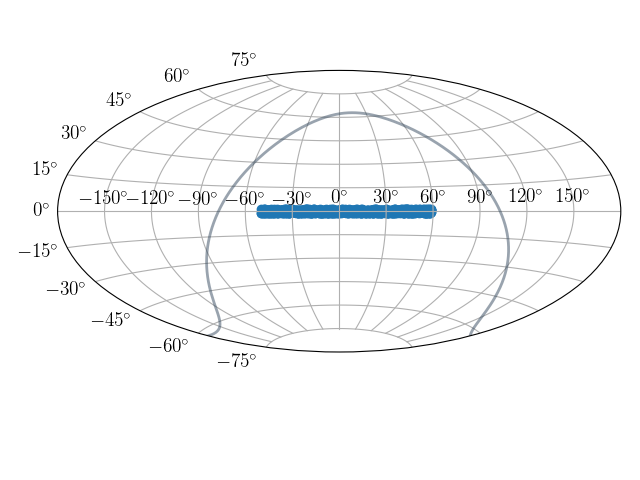

/Users/berto/Code/LSST_tools/lsst_tools


In [10]:
lsstt.plot_position_points(c)

## Retrieve MW Extinction
___

## Volume Element

In [11]:
binsize = 0.001
zmax = 2.0
z = np.arange(0.0, zmax, binsize)
z_dz = np.arange(0.0+binsize, zmax+binsize, binsize)

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

v_z = cosmo.comoving_volume(z)

# for i, z_iter in enumerate(z):
#     print (z[i], v_z[i])
v_z_dz = cosmo.comoving_volume(z_dz)

v_dz = v_z_dz - v_z

In [14]:
spl = InterpolatedUnivariateSpline(z, v_dz)

<IPython.core.display.Javascript object>


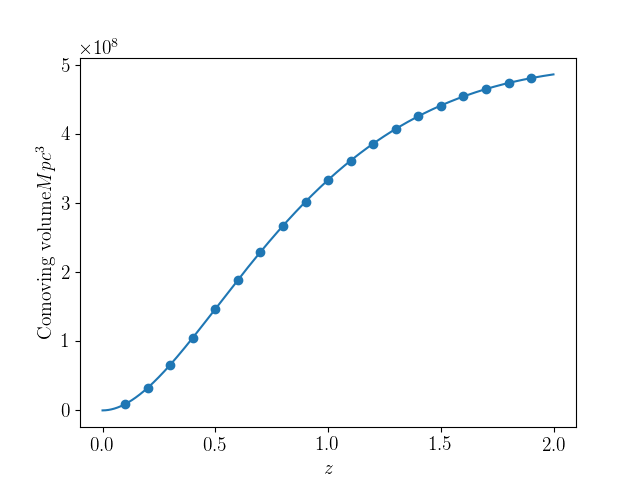

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(z, v_dz)
# ax.semilogy()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\textnormal{Comoving volume} M pc^3$")

ax.scatter(np.arange(0.1,2.0, 0.1), spl(np.arange(0.1,2.0, 0.1)))

In [ ]:
class gen_random_z_volume_element(rv_continuous):
    """random z weighted by volume element"""
    def _pdf(self, z_gen):
        binsize = 0.001
        zmax = 2.0
        z = np.arange(0.0, zmax, binsize)
        z_dz = np.arange(0.0+binsize, zmax+binsize, binsize)

        cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

        v_z = cosmo.comoving_volume(z)
        v_z_dz = cosmo.comoving_volume(z_dz)

        v_dz = v_z_dz - v_z
        
        norm_v_dz = v_dz/np.nanmax(v_dz)
        
        v_el_spline = InterpolatedUnivariateSpline(z, norm_v_dz)
        return v_el_spline(z_gen)
    
    def _cdf(self, z_gen):
        binsize = 0.001
        zmax = 2.0
        z = np.arange(0, zmax, binsize)
        
        cumsumz = np.cumsum(self.pdf(z))
        sumz = np.sum(self.pdf(z))
        
        normcumsum = cumsumz/sumz
        
        normcumsumspline = InterpolatedUnivariateSpline(z, normcumsum)
        return normcumsumspline(z_gen)

In [ ]:
rv = gen_random_z_volume_element(name = "vol el")

In [16]:
def pdf(z_gen):        
    binsize = 0.001
    zmax = 2.0
    z = np.arange(0.0, zmax, binsize)
    z_dz = np.arange(0.0+binsize, zmax+binsize, binsize)

    cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

    v_z = cosmo.comoving_volume(z)
    v_z_dz = cosmo.comoving_volume(z_dz)

    v_dz = v_z_dz - v_z

    norm_v_dz = v_dz/np.nanmax(v_dz)

    v_el_spline = InterpolatedUnivariateSpline(z, norm_v_dz)
    return v_el_spline(z_gen)

<IPython.core.display.Javascript object>


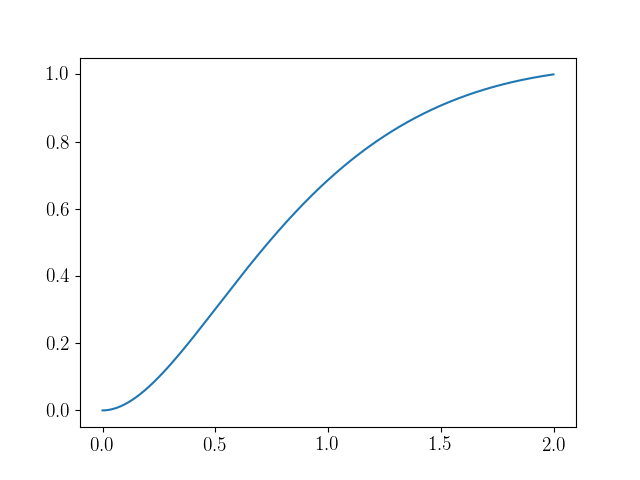

In [53]:
binsize = 0.001
zmax = 2.0
z = np.arange(0.0, zmax, binsize)
plt.plot(z, pdf(z))

In [59]:
%%timeit

# plot = True ## for nreq=1000 - 1 loop, best of 3: 3.31 s per loop
plot = False ## for nreq=1000 - 10 loops, best of 3: 43.1 ms per loop
             ## for nreq=10000 - 10 loops, best of 3: 10 loops, best of 3: 198 ms per loop
if plot:
    fig = plt.figure()
    ax = fig.add_subplot(111)

binsize = 0.001
zmax = 2.0
z = np.arange(0.0, zmax, binsize)
z_dz = np.arange(0.0+binsize, zmax+binsize, binsize)

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

v_z = cosmo.comoving_volume(z)
v_z_dz = cosmo.comoving_volume(z_dz)

v_dz = v_z_dz - v_z

norm_v_dz = v_dz/np.nanmax(v_dz)

# v_el_spline = InterpolatedUnivariateSpline(z, norm_v_dz)
pdf = InterpolatedUnivariateSpline(z, norm_v_dz)

n_req = 10000
n = 0
z_sim = []
while n < n_req:
    x = np.random.random()*zmax
    y = np.random.random()

    if y <= pdf(x):
        if plot:
            ax.scatter(x, y, color = "C1")
        z_sim.append(x)
        n += 1
    else:
        if plot:
            ax.scatter(x, y, color = "Black")

10 loops, best of 3: 198 ms per loop


In [52]:
plt.hist(z_sim, bins = 100)

(array([  1.,   2.,   2.,   1.,   2.,   2.,   4.,   4.,   3.,   1.,   4.,
          6.,   4.,   4.,   2.,   9.,   4.,   4.,   1.,   6.,   4.,   6.,
          6.,   8.,   4.,   4.,   7.,   8.,  10.,  10.,   4.,   4.,   7.,
         14.,  13.,   8.,   6.,   7.,  16.,  18.,  12.,   9.,   8.,  13.,
          6.,   7.,  11.,   8.,  15.,  13.,  12.,   9.,   5.,  17.,  11.,
         11.,  11.,  12.,  11.,  12.,  14.,   9.,  10.,  14.,  12.,  11.,
          7.,   8.,  11.,  15.,  14.,  14.,  14.,  11.,  11.,  12.,  12.,
         12.,  11.,  16.,  16.,  19.,   9.,  18.,  12.,  18.,  11.,  17.,
         15.,  21.,  19.,  17.,  18.,  11.,  20.,  21.,  21.,  14.,  11.,
         11.]),
 array([ 0.17025237,  0.18853462,  0.20681687,  0.22509913,  0.24338138,
         0.26166363,  0.27994589,  0.29822814,  0.31651039,  0.33479265,
         0.3530749 ,  0.37135715,  0.38963941,  0.40792166,  0.42620391,
         0.44448617,  0.46276842,  0.48105067,  0.49933293,  0.51761518,
         0.53589743,  0.55

In [ ]:
binsize = 0.001
zmax = 2.0
z = np.arange(0, zmax, binsize)
rv.cdf(z)

In [ ]:
rv.rvs(size = 10)

In [ ]:
plt.scatter(np.arange(0.1, 2.0, 0.1), rv.cdf(np.arange(0.1, 2.0, 0.1)))


In [ ]:
np.sum(rv.pdf(np.arange(0.1, 2.0, 0.1)))

## SFH
___
Hopkins & Beacom

$ \textrm{sfr}=(a+b*z)*h/(1.+(z/c)^d)$

with

$a=0.0170, 
b=0.13, 
c=3.3, 
d=5.3$

In [60]:
binsize = 0.001
z = np.arange(0.0+(binsize/2.), 4+(binsize/2.), binsize)

a=0.0170
b=0.13
c=3.3
d=5.3
h = 0.7

sfr=(a+b*z)*h/(1.+(z/c)**d)

<IPython.core.display.Javascript object>


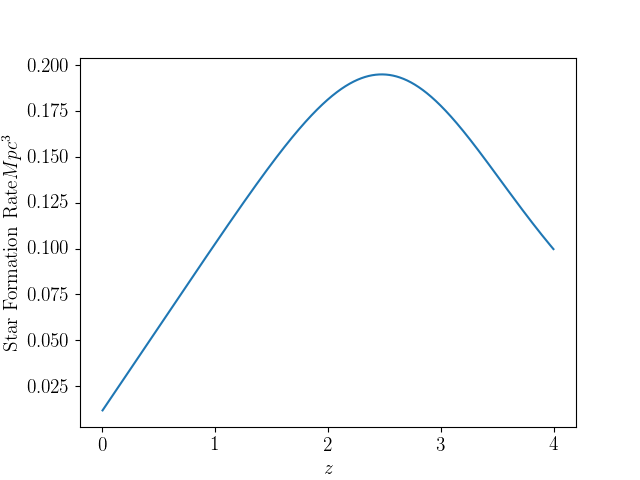

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(z, sfr)

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\textnormal{Star Formation Rate} M pc^3$")

In [63]:
def sfr(z):
    # binsize = 0.001
    # z = np.arange(0.0+(binsize/2.), 4+(binsize/2.), binsize)

    a=0.0170
    b=0.13
    c=3.3
    d=5.3
    h = 0.7

    sfr=(a+b*z)*h/(1.+(z/c)**d)
    return sfr

<IPython.core.display.Javascript object>


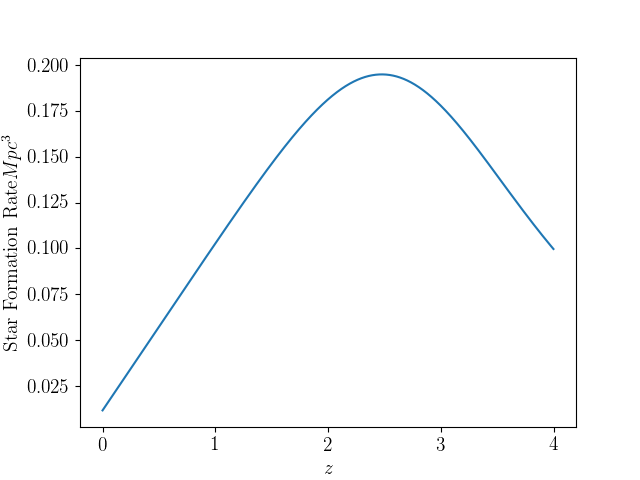

In [77]:
binsize = 0.001
zmax = 4.0
z = np.arange(0, zmax, binsize)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(z, sfr(z))

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\textnormal{Star Formation Rate} M pc^3$")

<IPython.core.display.Javascript object>


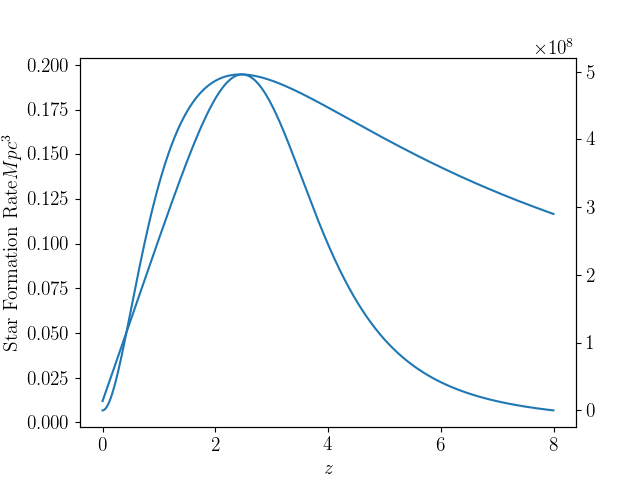

In [80]:
binsize = 0.001
zmax = 8.0
z = np.arange(0, zmax, binsize)

z_dz = np.arange(0.0+binsize, zmax+binsize, binsize)

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

v_z = cosmo.comoving_volume(z)
v_z_dz = cosmo.comoving_volume(z_dz)
v_dz = v_z_dz - v_z


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(z, sfr(z))

ax2 = ax1.twinx()
ax2.plot(z, v_dz)

ax1.set_xlabel(r"$z$")
ax1.set_ylabel(r"$\textnormal{Star Formation Rate} M pc^3$")



In [86]:

# plot = True ## for nreq=1000 - 1 loop, best of 3: 3.31 s per loop
plot = False ## for nreq=1000 - 10 loops, best of 3: 43.1 ms per loop
             ## for nreq=10000 - 10 loops, best of 3: 10 loops, best of 3: 198 ms per loop
if plot:
    fig = plt.figure()
    ax = fig.add_subplot(111)

binsize = 0.01
zmax = 8.0
z = np.arange(0.0, zmax, binsize)
z_dz = np.arange(0.0+binsize, zmax+binsize, binsize)

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

v_z = cosmo.comoving_volume(z)
v_z_dz = cosmo.comoving_volume(z_dz)

v_dz = v_z_dz - v_z

norm_v_dz = v_dz/np.nanmax(v_dz)

sfr_z = sfr(z)
sfr_norm = sfr_z/np.nanmax(sfr(z))

volumetric_rate = norm_v_dz * sfr_norm

normed_volumetric_rate = volumetric_rate / np.nanmax(volumetric_rate)

# v_el_spline = InterpolatedUnivariateSpline(z, norm_v_dz)
pdf = InterpolatedUnivariateSpline(z, normed_volumetric_rate)

n_req = 10000
n = 0
z_sim = []
while n < n_req:
    x = np.random.random()*zmax
    y = np.random.random()

    if y <= pdf(x):
        if plot:
            ax.scatter(x, y, color = "C1")
        z_sim.append(x)
        n += 1
    else:
        if plot:
            ax.scatter(x, y, color = "Black")

<IPython.core.display.Javascript object>


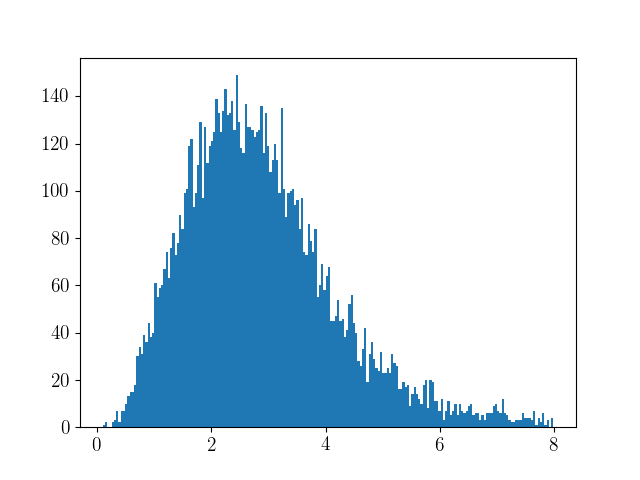

(array([   1.,    2.,    0.,    0.,    2.,    3.,    7.,    2.,    7.,
           7.,   10.,   13.,   15.,   15.,   18.,   30.,   34.,   31.,
          39.,   36.,   44.,   38.,   40.,   61.,   55.,   59.,   60.,
          67.,   74.,   63.,   76.,   82.,   73.,   78.,   90.,   84.,
          99.,  101.,  119.,  122.,   93.,   99.,  111.,  129.,   97.,
         127.,  112.,  119.,  121.,  125.,  139.,  133.,  125.,  134.,
         143.,  132.,  133.,  138.,  126.,  149.,  129.,  118.,  116.,
         137.,  127.,  127.,  126.,  123.,  125.,  126.,  136.,  116.,
         133.,  119.,  108.,  113.,  120.,  113.,   99.,  135.,  101.,
          89.,   99.,  100.,  101.,   94.,   96.,   84.,   97.,   74.,
          73.,   86.,   79.,   74.,   84.,   55.,   60.,   69.,   58.,
          64.,   68.,   45.,   45.,   47.,   54.,   45.,   46.,   38.,
          41.,   52.,   56.,   44.,   40.,   28.,   26.,   33.,   42.,
          19.,   31.,   36.,   29.,   25.,   24.,   32.,   23.,   23.,
      

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(z_sim, bins=200)

In [88]:
def choose_z_volume_SFR(n_req=10000, zmax=8.0, binsize=0.01):
    """

    :return:
    """


    z = np.arange(0.0, zmax, binsize)
    z_dz = np.arange(0.0 + binsize, zmax + binsize, binsize)

    cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

    v_z = cosmo.comoving_volume(z)
    v_z_dz = cosmo.comoving_volume(z_dz)

    v_dz = v_z_dz - v_z

    norm_v_dz = v_dz / np.nanmax(v_dz)

    sfr_z = sfr(z)
    sfr_norm = sfr_z / np.nanmax(sfr(z))

    volumetric_rate = norm_v_dz * sfr_norm
    normed_volumetric_rate = volumetric_rate / np.nanmax(volumetric_rate)

    pdf = InterpolatedUnivariateSpline(z, normed_volumetric_rate)


    n = 0
    z_sim = []
    while n < n_req:
        x = np.random.random() * zmax
        y = np.random.random()

        if y <= pdf(x):
            z_sim.append(x)
            n += 1


    return z_sim

In [90]:
len(choose_z_volume_SFR())

10000

## Fuzz